In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('diamonds.csv')

df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [2]:

print(df.describe())

         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

In [3]:

print(df['cut'].value_counts())
print(df['color'].value_counts())
print(df['clarity'].value_counts())

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [4]:
# Droppa kolumnen 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

# Kontrollera att kolumnen är borttagen
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [5]:
from sklearn.preprocessing import LabelEncoder

# Skapa en LabelEncoder-instans
le = LabelEncoder()

# Enkoda de kategoriska kolumnerna
df['cut'] = le.fit_transform(df['cut'])
df['color'] = le.fit_transform(df['color'])
df['clarity'] = le.fit_transform(df['clarity'])

# Kontrollera att de kategoriska variablerna har blivit numeriska
print(df.head())


   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75


In [6]:
from scipy.stats import shapiro

# Shapiro-Wilk Test för att kontrollera normalfördelning av kolumnen 'price'
stat, p = shapiro(df['price'])
print(f'Statistikvärde: {stat}, p-värde: {p}')

# Tolka resultatet
if p > 0.05:
    print("Datan verkar vara normalfördelad.")
else:
    print("Datan är inte normalfördelad.")


Statistikvärde: 0.798107922077179, p-värde: 0.0
Datan är inte normalfördelad.
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


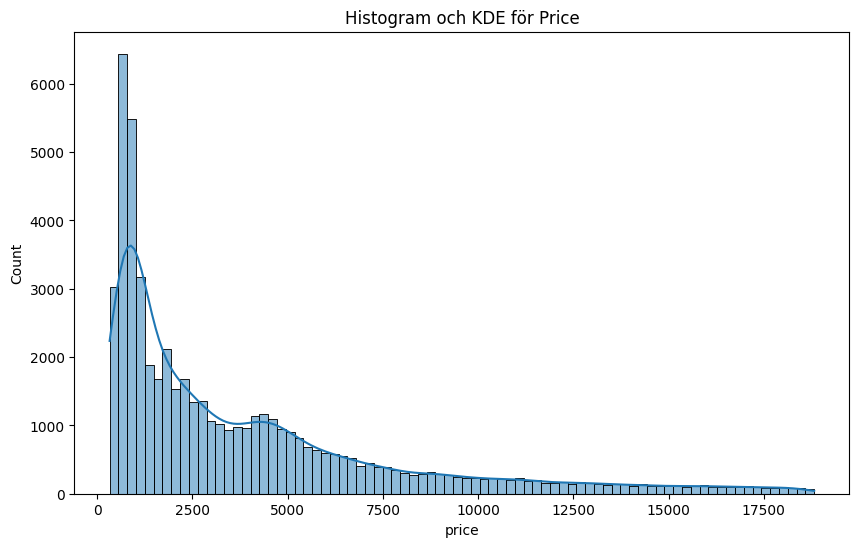

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram och KDE för 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Histogram och KDE för Price')
plt.show()


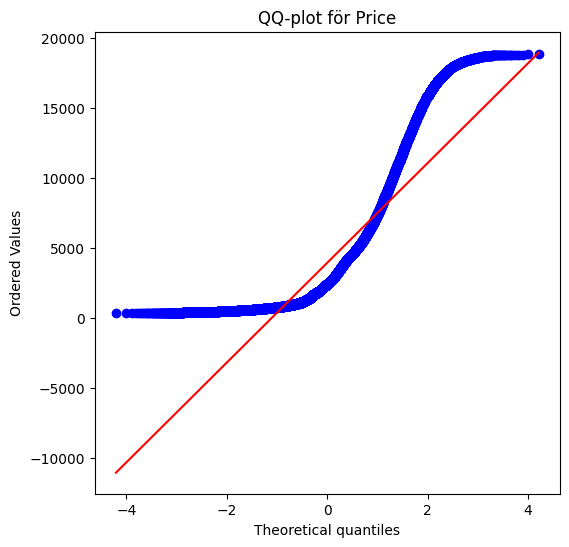

In [8]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# QQ-plot för 'price'
plt.figure(figsize=(6, 6))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ-plot för Price')
plt.show()


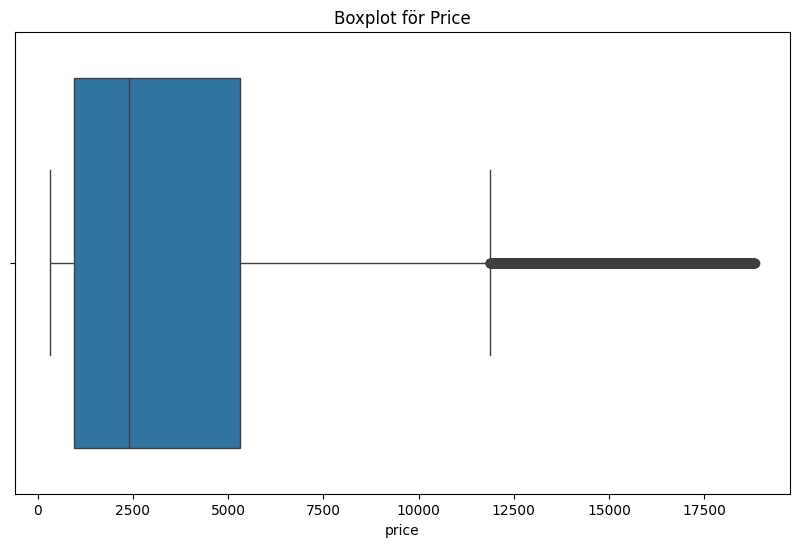

In [9]:
# Boxplot för 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot för Price')
plt.show()


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
cut,53940.0,2.553003,1.027708,0.0,2.00,2.00,3.00,4.00
color,53940.0,2.594197,1.701105,0.0,1.00,3.00,4.00,6.00
clarity,53940.0,3.835150,1.724591,0.0,2.00,4.00,5.00,7.00
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [11]:
from sklearn.preprocessing import StandardScaler

# Välj alla numeriska kolumner att skala
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Initiera StandardScaler
scaler = StandardScaler()

# Skala alla numeriska kolumner
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Kontrollera resultatet efter skalning
print(df.head())


      carat  cut  color  clarity     depth     table     price         x  \
0 -1.198168    2      1        3 -0.174092 -1.099672 -0.904095 -1.587837   
1 -1.240361    3      1        2 -1.360738  1.585529 -0.904095 -1.641325   
2 -1.198168    1      1        4 -3.385019  3.375663 -0.903844 -1.498691   
3 -1.071587    3      5        5  0.454133  0.242928 -0.902090 -1.364971   
4 -1.029394    1      6        3  1.082358  0.242928 -0.901839 -1.240167   

          y         z  
0 -1.536196 -1.571129  
1 -1.658774 -1.741175  
2 -1.457395 -1.741175  
3 -1.317305 -1.287720  
4 -1.212238 -1.117674  


In [12]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
carat,53940.0,2.444878e-16,1.000009,-1.261458,-0.839523,-0.206621,0.510668,8.886075
cut,53940.0,2.553003e+00,1.027708,0.000000,2.000000,2.000000,3.000000,4.000000
color,53940.0,2.594197e+00,1.701105,0.000000,1.000000,3.000000,4.000000,6.000000
clarity,53940.0,3.835150e+00,1.724591,0.000000,2.000000,4.000000,5.000000,7.000000
depth,53940.0,-3.996902e-15,1.000009,-13.087603,-0.523105,0.035317,0.523936,12.041392
table,53940.0,9.695207e-17,1.000009,-6.470073,-0.652139,-0.204605,0.690462,16.801666
price,53940.0,-9.273676e-17,1.000009,-0.904095,-0.747681,-0.383967,0.348787,3.732438
x,53940.0,2.782103e-16,1.000009,-5.109120,-0.910325,-0.027776,0.721054,4.465203
y,53940.0,-8.430615e-17,1.000009,-5.020931,-0.888280,-0.021474,0.705242,46.549648
z,53940.0,-2.002271e-16,1.000009,-5.014556,-0.890946,-0.012376,0.710318,40.047576


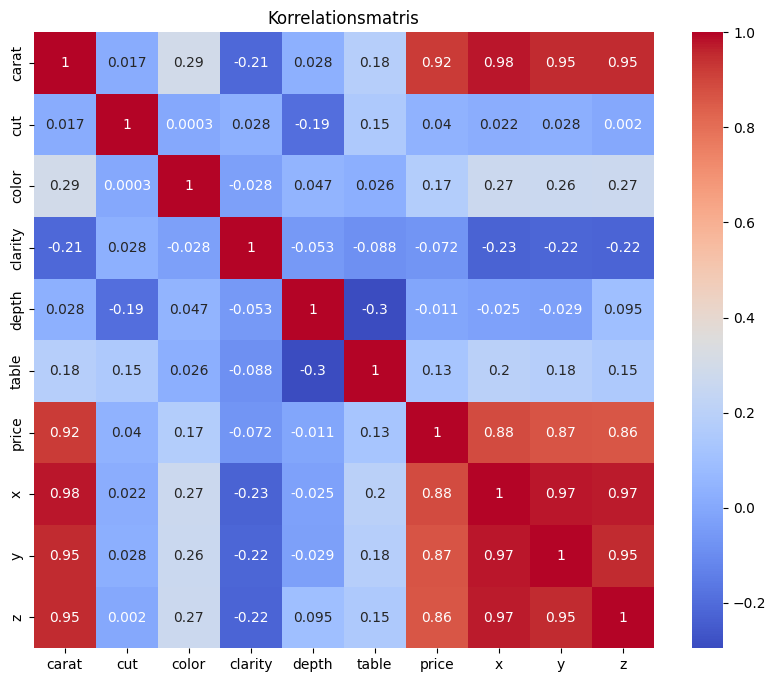

In [13]:
# Rita korrelationsmatris för att se relationerna mellan variabler
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korrelationsmatris')
plt.show()

In [14]:
# Importera nödvändiga bibliotek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Binarisera målvariabeln 'price' baserat på medianen
df['price_binary'] = (df['price'] > df['price'].median()).astype(int)

# Välj ut de mest korrelerade funktionerna från korrelationsmatrisen
features = ['carat', 'x', 'y', 'z']

# Definiera X (prediktorer) och y (målvariabel)
X = df[features]
y = df['price_binary']

# Dela upp data i tränings- och testmängder
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardisera data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Träna en logistisk regressionsmodell
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Gör prediktioner på testdatan
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Beräkna AUC-ROC
auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC: {auc}')



AUC-ROC: 0.9910862273827508


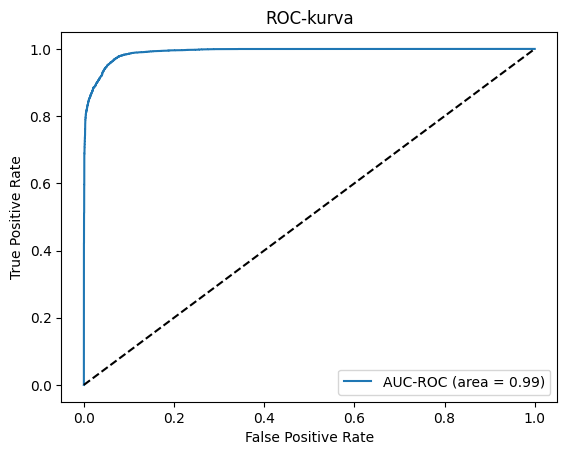

In [15]:
# Rita ROC-kurvan
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC-ROC (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-kurva')
plt.legend()
plt.show()


# Jag började med EDA för att hitta vilka variabler som påverkar priset(Målvariabeln) mest. Såg att karat och dimensionerna (x, y, z) hade starkast samband med priset.

# Sen byggde jag en logistisk regressionsmodell  för att förutsäga om priset är högt eller lågt. Använde de viktigaste variablerna och modellen fick AUC-ROC 0.9918, vilket är riktigt bra.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=abfcac72-e500-4803-a5e4-0c8987b7c3f6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>